# Steps
- Vectorize it
- Split test and train.
- Report the performance ( accuracy, error, f1, recall) 
- save the model.

In [1]:
import numpy as np
import pandas as pd 
import json
import pymongo
from pymongo import MongoClient
from bson.objectid import ObjectId 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import tree

import sklearn.metrics
from sklearn import metrics
import re
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import chi2
import pymongo
import random
from pymongo import MongoClient
pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
import pandas as pd
ds = pd.read_csv("dev/train.csv", sep="\t")

In [3]:
ds.head()

,_id,bid,original,sentiment,stars,text_corrected
0,5ae7a9d8348eba4793307c85,WeKF3N1MK0eJQmZdxPL9pQ,Love Marche and have since I went as a kid to ...,pos,4,love march since went kid location singapore p...
1,5ae7a9d9348eba4793307c86,SNn_I8VMds60C4bSXCyUtw,Every dish we tried was cooked to perfection w...,pos,5,dish tried cooked perfection complex subtle fa...
2,5ae7a9db348eba4793307c87,rfa_0AOmpwLTj32RL2Zvyw,yum yum yum!\\n\\nWent with a party of four - ...,pos,5,sum sum sum n went party four seated immediate...
3,5ae7a9db348eba4793307c88,ky8BMyjQm83cqq9fx_Rn3w,I get the whole rustic coffee shop feel that i...,neg,3,get whole rustic coffee shop feel rage think c...
4,5ae7a9de348eba4793307c89,NncsqhAElh0zykYdUULByg,The standard for decor and atmosphere for Mont...,pos,4,standard door atmosphere montreal dumping plac...


In [7]:
X = ds['text_corrected'].astype(str)
y = (ds['sentiment'] == 'pos').astype(int)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
vectorizer = CountVectorizer(min_df=5, max_df=1.0, binary=True)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [10]:
X_train_vec.shape, X_test_vec.shape, y_train.shape, y_test.shape

((56347, 12985), (24150, 12985), (56347,), (24150,))

In [11]:
f = pd.DataFrame(vectorizer.get_feature_names())

In [12]:
f[3000:4000:100]

,0
3000,decoration
3100,depressing
3200,dice
3300,disconnected
3400,dividing
3500,dramatic
3600,dumb
3700,effortlessly
3800,enable
3900,equation


In [13]:
clf = BernoulliNB()
clf.fit(X_train_vec, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [14]:
y_predict = clf.predict(X_train_vec)
accuracy_score(y_train[:], y_predict)

0.7886134133139298

In [15]:
y_predict = clf.predict(X_test_vec)
accuracy_score(y_test[:], y_predict)

0.7824430641821947

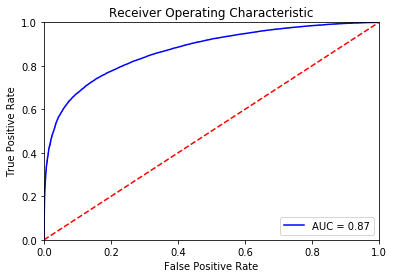

In [17]:


# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_train_vec)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train[:], preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



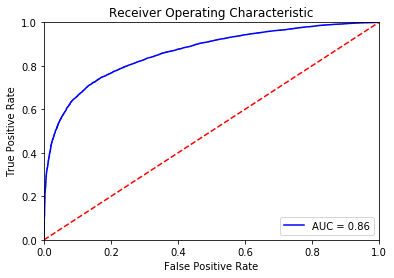

In [18]:


# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test_vec)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test[:], preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



## Logistic Regression


In [19]:
clf = LogisticRegression(penalty='l2', C = 0.001)
clf.fit(X_train_vec, y_train)
y_predict = clf.predict(X_train_vec)
y_proba = clf.predict_proba(X_test_vec)

print(accuracy_score(y_train[:], y_predict))

y_predict = clf.predict(X_test_vec)
y_proba = clf.predict_proba(X_test_vec)

print(accuracy_score(y_test[:], y_predict))

0.8378618205050846
0.8349068322981367


In [20]:
clf.predict(tt)

NameError: name 'tt' is not defined

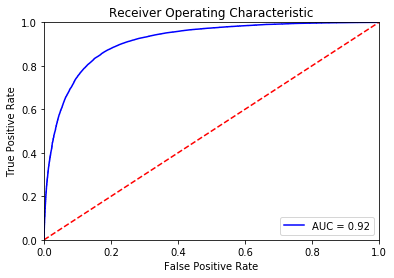

In [22]:


# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_train_vec)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train[:], preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SVM

In [23]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_vec, y_train)
y_predict = clf.predict(X_train_vec)

print(accuracy_score(y_train[:], y_predict))

y_predict = clf.predict(X_test_vec)
print(accuracy_score(y_test[:], y_predict))
pickle.dump(clf, open('clf_svm.sav', 'wb'))

0.7392585230801995
0.7358178053830228


NameError: name 'pickle' is not defined

In [51]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_vec, y_train)
y_predict = clf.predict(X_train_vec)

print(accuracy_score(y_train[:], y_predict))

y_predict = clf.predict(X_test_vec)
print(accuracy_score(y_test[:], y_predict))

0.73884375
0.73525


In [36]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_vec, y_train)
y_predict = clf.predict(X_train_vec)

print(accuracy_score(y_train[:], y_predict))

y_predict = clf.predict(X_test_vec)
print(accuracy_score(y_test[:], y_predict))

0.69125
0.68425


try linear kernel

In [20]:
print(accuracy_score(y_train[:], y_predict))

0.64875


In [21]:
y_predict = clf.predict(X_test_vec)
print(accuracy_score(y_test[:], y_predict))

0.658


In [9]:
train = ds_X[: 57890]

In [10]:
test = ds_X[56891:]

In [12]:
from textblob.classifiers import NaiveBayesClassifier


In [ ]:
for i in range(57890):
    cl = NaiveBayesClassifier(train[i:i+3000])
    random.shuffle(test)
    print(cl.accuracy(test[:1000]))
    print(cl.accuracy(train))
    pickle.dump(cl, open('batch'+str(i+3000)+'text.sav', 'wb'))
    

In [ ]:
print(len(train))
cl = NaiveBayesClassifier(train)
pickle.dump(cl, open('text57851.sav', 'wb'))

57890


In [13]:
cl.accuracy(train)

0.8861138861138861

In [21]:
cl.accuracy(test)

0.9108910891089109

In [97]:
import pickle

In [31]:
pickle.dump(vectorizer, open('vectorizer.sav', 'wb'))

In [23]:
pickle.dump(cl, open('text.sav', 'wb'))

In [116]:
!ls -lrth

total 489M
-rw-rw-r-- 1 pfsa pfsa   61 Apr 18 14:27 README.md
drwxrwxr-x 6 pfsa pfsa 4.0K Apr 18 16:09 data
-rw-rw-r-- 1 pfsa pfsa 128K Apr 30 15:32 all-rse-scripts
drwxrwxr-x 3 pfsa pfsa 4.0K Apr 30 16:38 final
drwxrwxr-x 3 pfsa pfsa 4.0K May  1 14:33 dev
-rw-rw-r-- 1 pfsa pfsa 205K May  1 14:53 SummaryExtraction.ipynb
-rw-rw-r-- 1 pfsa pfsa 371M May  1 15:19 text.sav
-rw-rw-r-- 1 pfsa pfsa 2.0M May  1 17:43 vectorizer.sav
-rw-rw-r-- 1 pfsa pfsa 117M May  1 18:43 clf_svm.sav
-rw-rw-r-- 1 pfsa pfsa  88K May  1 18:44 Final.ipynb


In [27]:
loaded_model = pickle.load(open('text.sav', 'rb'))

In [ ]:
!time

In [30]:
loaded_model.accuracy(test)

0.9108910891089109


### Using Neural Network

In [88]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_train_vec, y_train)       

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [89]:
y_predict = clf.predict(X_train_vec)

print(accuracy_score(y_train[:], y_predict))

0.9978348448009654


In [90]:
y_predict = clf.predict(X_test_vec)
print(accuracy_score(y_test[:], y_predict))

0.8428571428571429


using adam

In [94]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_train_vec, y_train)       

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [95]:
y_predict = clf.predict(X_train_vec)

print(accuracy_score(y_train[:], y_predict))

0.9889257635721511


In [96]:
y_predict = clf.predict(X_test_vec)
print(accuracy_score(y_test[:], y_predict))

0.8372670807453416
